<a href="https://colab.research.google.com/github/ved1beta/kaggle_pr_compition/blob/main/mainMain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
df = pd.read_csv('train.csv')

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
df.isna().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
modes = df.mode().iloc[0]
modes

,0
PassengerId,1
Survived,0.0
Pclass,3.0
Name,"Abbing, Mr. Anthony"
Sex,male
Age,24.0
SibSp,0.0
Parch,0.0
Ticket,1601
Fare,8.05


In [14]:
df.fillna(modes, inplace=True)

In [15]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [16]:
import numpy as np

df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df['LogFare']=np.log1p(df['Fare']);

<Axes: >

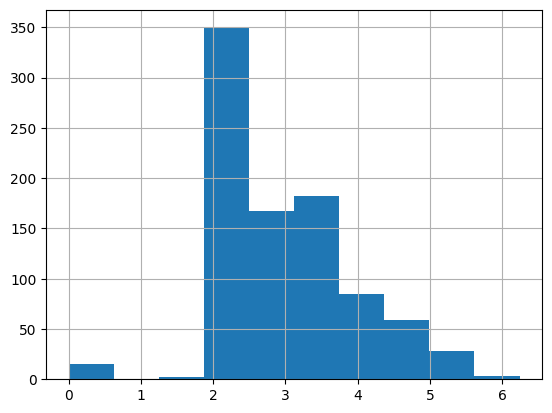

In [18]:
df['LogFare'].hist()

In [19]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [20]:
df = pd.get_dummies(df, columns=['Sex','Embarked','Pclass'], dtype=int)

In [21]:
df

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,LogFare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,2.110213,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,4.280593,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2.188856,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,3.990834,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,B96 B98,2.202765,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,B96 B98,2.639057,0,1,0,0,1,0,1,0
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,3.433987,1,0,0,0,1,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",24.0,1,2,W./C. 6607,23.4500,B96 B98,3.196630,1,0,0,0,1,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,3.433987,0,1,1,0,0,1,0,0


In [22]:
added_cols = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[added_cols].head()

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,0,1,0,0,1
1,0,1,1,0,0,1,0,0
2,0,1,0,0,1,0,0,1
3,0,1,1,0,0,0,0,1
4,1,0,0,0,1,0,0,1


In [23]:
from torch import tensor

t_dep = tensor(df.Survived)



In [24]:
import torch
indep_cols = ['Age', 'SibSp', 'Parch', 'LogFare'] + added_cols

t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[22.,  1.,  0.,  ...,  0.,  0.,  1.],
        [38.,  1.,  0.,  ...,  1.,  0.,  0.],
        [26.,  0.,  0.,  ...,  0.,  0.,  1.],
        ...,
        [24.,  1.,  2.,  ...,  0.,  0.,  1.],
        [26.,  0.,  0.,  ...,  1.,  0.,  0.],
        [32.,  0.,  0.,  ...,  0.,  1.,  0.]])

In [25]:
t_indep.shape

torch.Size([891, 12])

In [46]:
torch.manual_seed(442)

n_coeffs = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625])

In [47]:
t_indep*coeffs

tensor([[-0.1273,  0.0173,  0.0000,  ..., -0.0000,  0.0000,  0.3625],
        [-0.2199,  0.0173,  0.0000,  ..., -0.4392,  0.0000,  0.0000],
        [-0.1504,  0.0000,  0.0000,  ..., -0.0000,  0.0000,  0.3625],
        ...,
        [-0.1389,  0.0173,  0.0803,  ..., -0.0000,  0.0000,  0.3625],
        [-0.1504,  0.0000,  0.0000,  ..., -0.4392,  0.0000,  0.0000],
        [-0.1852,  0.0000,  0.0000,  ..., -0.0000,  0.2103,  0.0000]])

In [48]:
vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals

In [49]:
t_indep*coeffs

tensor([[-0.1273,  0.0173,  0.0000,  ..., -0.0000,  0.0000,  0.3625],
        [-0.2199,  0.0173,  0.0000,  ..., -0.4392,  0.0000,  0.0000],
        [-0.1504,  0.0000,  0.0000,  ..., -0.0000,  0.0000,  0.3625],
        ...,
        [-0.1389,  0.0173,  0.0803,  ..., -0.0000,  0.0000,  0.3625],
        [-0.1504,  0.0000,  0.0000,  ..., -0.4392,  0.0000,  0.0000],
        [-0.1852,  0.0000,  0.0000,  ..., -0.0000,  0.2103,  0.0000]])

In [50]:
preds = (t_indep*coeffs).sum(axis=1)


In [51]:
preds[:10]

tensor([ 0.1927, -0.6239,  0.0979,  0.2056,  0.0968,  0.0066,  0.1306,  0.3476,
         0.1613, -0.6285])

In [52]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(0.5382)

In [53]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

In [54]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [55]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.5382, grad_fn=<MeanBackward0>)

In [56]:
dd=coeffs.grad

In [57]:
dd

In [58]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()

In [59]:
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.5197)


# New Section training the modle

In [60]:
import fastai
from fastai.data.transforms import *
from fastai.data.all import *

In [61]:
trn_split, val_split= RandomSplitter(seed=42)(df)
trn_split

(#713) [788,525,821,253,374,98,215,313,281,305...]

In [62]:
trn_indep , val_indep = t_indep[trn_split], t_indep[val_split]
trn_dep , val_dep = t_dep[trn_split], t_dep[val_split]

In [63]:
def update_coeffs(coeffs, lr=0.1):
        coeffs.sub_(coeffs.grad * lr)

In [64]:
def one_epoch(coeffs, lr=0.1):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad():
        update_coeffs(coeffs, lr)
        print(f"{loss:.3f}", end=";")

In [65]:
def one_epoch(coeffs, lr=0.1):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad():
        update_coeffs(coeffs, lr)
        print(f"{loss:.3f}", end=";")

In [72]:
def init_coeffs():


    return (torch.rand(n_coeffs)-0.5).requires_grad_()

In [87]:
def train_model(epochs=30, lr=0.01):
    coeffs = init_coeffs()
    for i in range(epochs):
        one_epoch(coeffs, lr)
    return coeffs

In [88]:
coeffs = train_model(18, 0.02)

0.822;0.793;0.738;0.692;0.658;0.630;0.607;0.590;0.590;0.596;0.595;0.589;0.577;0.558;0.539;0.523;0.508;0.489;

In [89]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'Age': tensor(-0.1455),
 'SibSp': tensor(-0.2609),
 'Parch': tensor(0.3571),
 'LogFare': tensor(0.4099),
 'Sex_male': tensor(0.0602),
 'Sex_female': tensor(0.6256),
 'Pclass_1': tensor(0.5206),
 'Pclass_2': tensor(0.1486),
 'Pclass_3': tensor(0.1212),
 'Embarked_C': tensor(-0.0267),
 'Embarked_Q': tensor(-0.1400),
 'Embarked_S': tensor(0.1557)}

In [90]:
preds = calc_preds(coeffs, val_indep)
results = val_dep.bool() == (preds>0.5)
results[:16]

tensor([ True,  True,  True, False,  True,  True,  True,  True, False,  True,
        False, False,  True,  True,  True,  True])

In [91]:
results.float().mean()


tensor(0.7584)

In [102]:
def acc(coeffs): return (val_dep.bool() == (calc_preds(coeffs, val_indep)>0.5)).float().mean()

using gigmoid :)



In [103]:
preds

tensor([0.7609, 0.1401, 0.2495, 0.6149, 0.4924, 0.4731, 0.9477, 1.0524, 0.5454,
        0.9104, 0.4227, 0.3210, 0.5207, 0.7067, 0.4076, 0.8724, 0.8360, 1.1605,
        0.5101, 0.9953, 0.4370, 0.8524, 1.3853, 1.2043, 0.4377, 0.1770, 1.0916,
        0.8415, 0.4552, 0.7057, 1.1896, 1.0836, 0.4461, 0.4263, 0.7499, 1.1157,
        0.8845, 1.3552, 0.4381, 0.9683, 0.4904, 0.4381, 0.6336, 1.3469, 0.4454,
        1.3690, 0.5559, 0.4362, 0.1339, 1.0012, 0.5918, 0.5309, 0.5378, 0.4286,
        0.4776, 0.4667, 0.1402, 0.4233, 0.4436, 0.4717, 0.7201, 0.4106, 0.8165,
        0.4427, 1.0338, 1.0442, 0.4942, 0.4780, 0.1797, 1.0238, 0.4334, 0.9786,
        0.4685, 0.4479, 0.9091, 0.4507, 0.4381, 0.9310, 0.5033, 0.4611, 0.5993,
        1.5012, 0.4388, 0.4321, 0.9995, 0.4694, 0.7974, 1.6779, 0.8754, 0.4960,
        0.4258, 0.4381, 1.3721, 0.2385, 0.9107, 0.2893, 0.4973, 0.7074, 0.7093,
        0.1414, 0.4745, 0.7057, 0.4225, 0.4261, 0.9142, 0.4615, 0.4370, 1.1264,
        0.7730, 0.3887, 1.2055, 1.0070, 

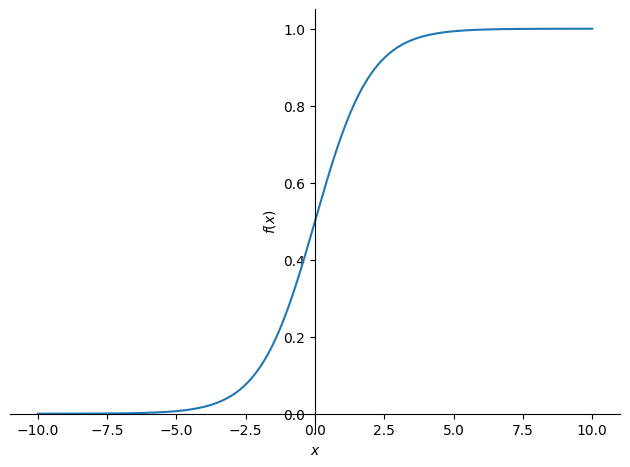

In [104]:
import sympy

x = sympy.Symbol('x')  # Define 'x' as a SymPy symbol
expr = 1 / (1 + sympy.exp(-x))  # Create the expression using SymPy functions
sympy.plot(expr, (x, -10, 10))

In [105]:
#redefining cal_preds
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [106]:
coeffs = train_model(lr=0.2)

0.574;0.571;0.563;0.552;0.536;0.517;0.492;0.465;0.437;0.410;0.387;0.368;0.354;0.343;0.334;0.328;0.323;0.318;0.314;0.310;0.305;0.301;0.296;0.291;0.286;0.280;0.274;0.268;0.261;0.254;

In [107]:
acc(coeffs)

tensor(0.7921)

In [108]:
show_coeffs()

{'Age': tensor(-0.8101),
 'SibSp': tensor(-0.0186),
 'Parch': tensor(0.1314),
 'LogFare': tensor(-0.3923),
 'Sex_male': tensor(-4.8950),
 'Sex_female': tensor(3.2791),
 'Pclass_1': tensor(1.0579),
 'Pclass_2': tensor(0.0078),
 'Pclass_3': tensor(-3.1413),
 'Embarked_C': tensor(0.5544),
 'Embarked_Q': tensor(-0.2270),
 'Embarked_S': tensor(-2.6311)}

In [109]:
tst_df = pd.read_csv('test.csv')
tst_df['Fare'] = tst_df['Fare'].fillna(tst_df['Fare'].mean())
tst_df['LogFare']=np.log1p(tst_df['Fare']);
tst_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LogFare
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2.178064
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.079442
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,2.369075
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2.268252
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.586824
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,2.202765
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,4.699571
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,2.110213
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,2.202765


In [110]:
tst_df.fillna(modes, inplace=True)
tst_df['LogFare']=np.log1p(tst_df['Fare']);
tst_df = pd.get_dummies(tst_df, columns=['Sex','Embarked','Pclass'], dtype=int)
tst_indep = tensor(tst_df[indep_cols].values, dtype=torch.float)
tst_indep= tst_indep / vals

In [111]:
tst_df['survived']=(calc_preds(coeffs, tst_indep)>0.5).int()
sub_df=tst_df[['PassengerId','survived']]
sub_df.to_csv('submission.csv',index=False)

In [112]:
!head submission.csv


PassengerId,survived
892,0
893,0
894,0
895,0
896,0
897,0
898,0
899,0
900,0
